In [184]:
'''
This Project aims to investigate the period before and after the 2008 Glabal Financial Crash. 
The data is imported from Yahoo Finance for the preiods 2006 to 2016. Retturns are calculated for a number of major banks.
This data is then analysed using Pandas. Subsequently, the data is visualied using plotly, pandas and seaborn.
Interactive plots are also produced, as well as correlation heatmaps and cluster maps. 
Finally, plottly is used to generate candlestick charts, simple moving averages, bollinger
'''
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [185]:
'''Use Pandas DataReader to get info of 6 major US Banks from 01/01/2006 to 01/01/2016
Data used from yahoo finance
Bank of America
CitiGroup
Goldman Sachs
JPMorgan Chase
Morgan Stanley
Wells Fargo
'''

'Use Pandas DataReader to get info of 6 major US Banks from 01/01/2006 to 01/01/2016\nData used from yahoo finance\nBank of America\nCitiGroup\nGoldman Sachs\nJPMorgan Chase\nMorgan Stanley\nWells Fargo\n'

In [186]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)
BAC = data.DataReader("BAC", 'yahoo', start, end)
C = data.DataReader("C", 'yahoo', start, end)
GS = data.DataReader("GS", 'yahoo', start, end)
JPM = data.DataReader("JPM", 'yahoo', start, end)
MS = data.DataReader("MS", 'yahoo', start, end)
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [187]:
WFC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,31.975000,31.195000,31.600000,31.900000,11016400.0,20.823185
2006-01-04,31.820000,31.365000,31.799999,31.530001,10870000.0,20.581659
2006-01-05,31.555000,31.309999,31.500000,31.495001,10158000.0,20.558811
2006-01-06,31.775000,31.385000,31.580000,31.680000,8403800.0,20.679575
2006-01-09,31.825001,31.555000,31.674999,31.674999,5619600.0,20.676311


In [188]:
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

In [189]:
#Now to concatenate individual bank dataframes to Ticker list into one major dataframe
#Set key to be ticker list, and create new columns for each bank and stock info

In [190]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC], keys=tickers, axis=1)
bank_stocks.columns.names = ['Bank Tickers','Stock Info']

In [191]:
bank_stocks.head()

Bank Tickers        BAC                                               \
Stock Info         High        Low       Open      Close      Volume   
Date                                                                   
2006-01-03    47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04    47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05    46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06    46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09    46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Tickers                      C                                      ...  \
Stock Info    Adj Close        High         Low        Open       Close  ...   
Date                                                                     ...   
2006-01-03    35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04    34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05    34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06    34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09    34.938789  487.399994  483.000000  486.000000  483.899994  ...   

Bank Tickers         MS                                         WFC  \
Stock Info         Open      Close     Volume  Adj Close       High   
Date                                                                  
2006-01-03    57.169998  58.310001  5377000.0  37.758644  31.975000   
2006-01-04    58.700001  58.349998  7977800.0  37.784546  31.820000   
2006-01-05    58.549999  58.509998  5778000.0  37.888165  31.555000   
2006-01-06    58.770000  58.570000  6889800.0  37.927017  31.775000   
2006-01-09    58.630001  59.189999  4144500.0  38.328484  31.825001   

Bank Tickers                                                          
Stock Info          Low       Open      Close      Volume  Adj Close  
Date                                                                  
2006-01-03    31.195000  31.600000  31.900000  11016400.0  20.823185  
2006-01-04    31.365000  31.799999  31.530001  10870000.0  20.581659  
2006-01-05    31.309999  31.500000  31.495001  10158000.0  20.558811  
2006-01-06    31.385000  31.580000  31.680000   8403800.0  20.679575  
2006-01-09    31.555000  31.674999  31.674999   5619600.0  20.676311  

[5 rows x 36 columns]

In [192]:
#What is each bank's max closing price in given period?

In [193]:
bank_stocks['BAC']['Close'].max() #For BOC

54.900001525878906

In [194]:
#One method
for tick in tickers:
   print(tick,bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


In [195]:

#Using .xs()
#bank_stocks.xs(key='WFC',axis=1,level='Bank Tickers')#This gives just WFC info...
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()
#Above give max close prices for each bank in given period

Bank Tickers
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [196]:
#Creating empty 'returns' dataframe
returns = pd.DataFrame()

In [197]:
#using pandas pct_change() method on the Close column to create a column for 'return' value

In [198]:
for tick in tickers:
    returns[tick +' Returns'] = bank_stocks[tick]['Close'].pct_change()

In [199]:
#Checking
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


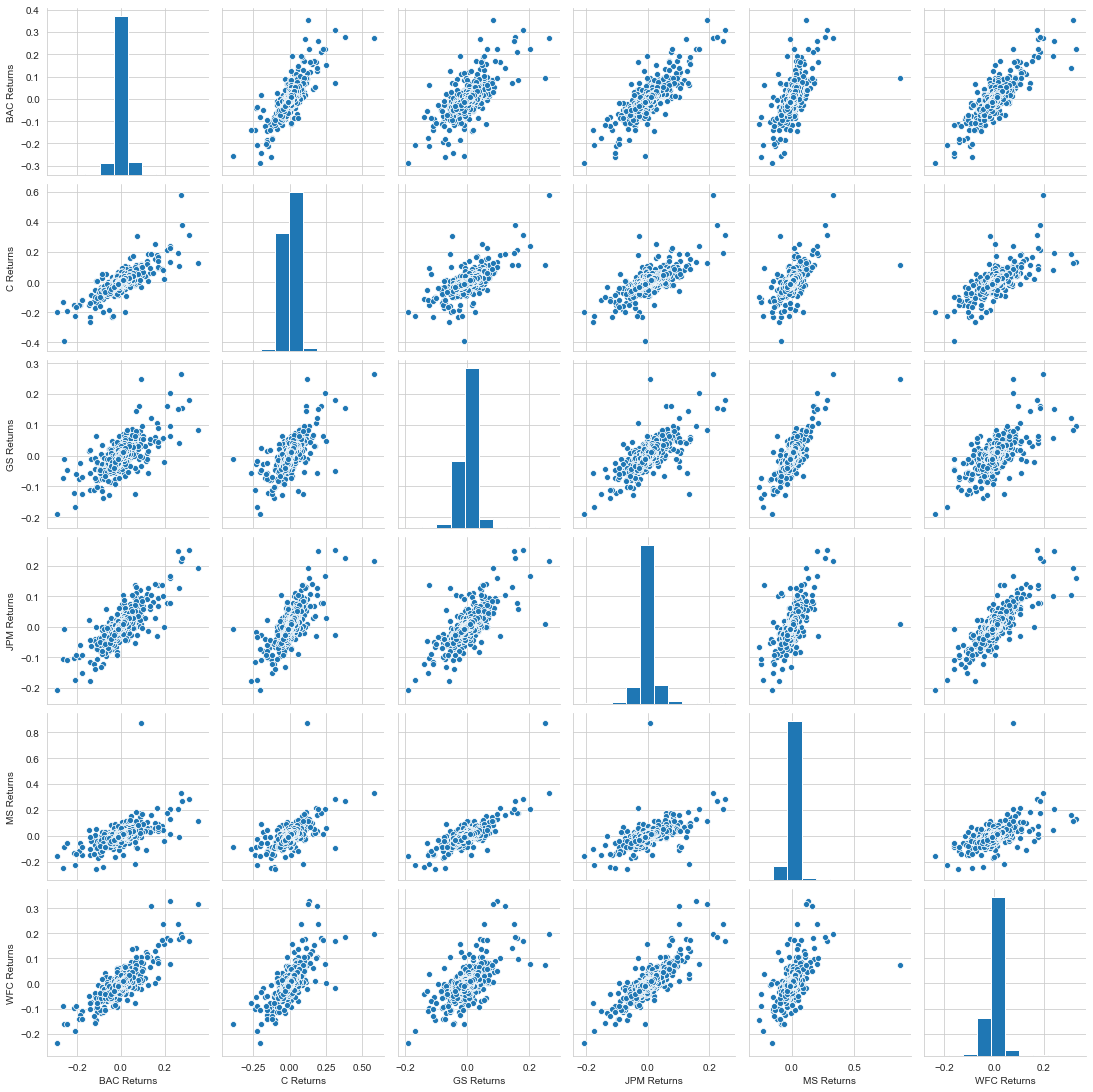

In [200]:
#Investigating with seaborn pair plot
sns.pairplot(data=returns[1:])

In [201]:
#Finding dates of lowest return
returns.idxmin()
#Notice 4 banks had same lowest day!

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [202]:
#Highest returns dates
returns.idxmax()
#JPM biggest returns was day after, so nothing political (Obama's inauguration)

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

In [203]:
#Looking at standard deviations for returns (overall)

In [204]:
returns.std()
#CitiGroup has highest -> riskiest

BAC Returns    0.036647
C Returns      0.038672
GS Returns     0.025390
JPM Returns    0.027667
MS Returns     0.037819
WFC Returns    0.030238
dtype: float64

In [205]:
#Looking at standard deviations for returns (for 2015 only)
returns.loc['2015'].head()
#Indexing for 2015

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2015-01-02,0.000559,0.002772,0.002992,-0.001438,-0.002320,-0.002189
2015-01-05,-0.029050,-0.031515,-0.031223,-0.031045,-0.031258,-0.027422
2015-01-06,-0.029919,-0.035205,-0.020229,-0.025929,-0.028800,-0.020865
2015-01-07,0.004745,0.009270,0.014903,0.001526,0.014278,0.005951
2015-01-08,0.020661,0.015048,0.015965,0.022346,0.014889,0.022137


In [206]:
#Finding std for location
returns.loc['2015'].std()
#Highest is MS in this case

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

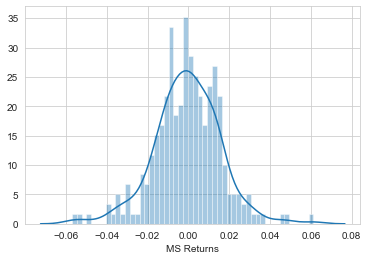

In [207]:
#Generate a Seaborn distribution plot for 2015 Morgan Stanley returns
sns.distplot(returns.loc['2015']['MS Returns'], bins = 50)

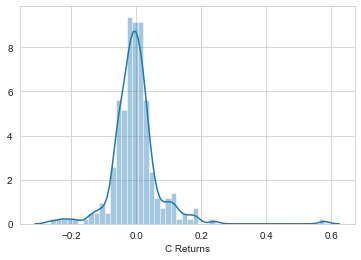

In [208]:
#Generate a Seaborn distribution plot for 2008 CitiGroup returns
sns.distplot(returns.loc['2008']['C Returns'], bins = 50)

In [ ]:
#Using Plotly and cufflinks

In [210]:
#Generating a line plot showing Close price for each bank for the entire index of time
bank_stocks.xs(key='Close', axis = 1, level = 'Stock Info').head()

Bank Tickers,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999


In [227]:
import plotly.graph_objects as go
bank_stocks.xs(key='Close', axis = 1, level = 'Stock Info').iplot()

In [228]:
#Looking at BAC rolling mean f0r 2008
BAC['Close'].loc['2008'].rolling(window=30).mean()
#Using .rolling(window=30).mean() for 30 day moving average

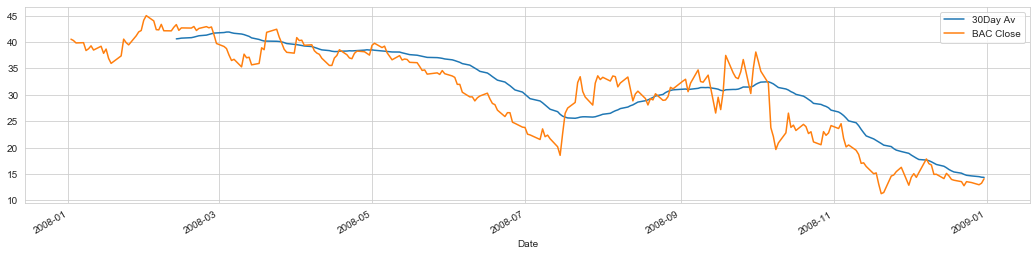

In [254]:
#Plotting this  plotly vs stock price
plt.figure(figsize=(18,4))
BAC['Close'].loc['2008'].rolling(window=30).mean().plot(label='30Day Av')
BAC['Close'].loc['2008'].plot(label='BAC Close')
plt.legend()

In [ ]:
#Now to create a heatmap of the correlation between the stocks Close Prices

In [261]:
#Generate correlation data
ht = bank_stocks.xs(key='Close', axis = 1, level = 'Stock Info').corr()

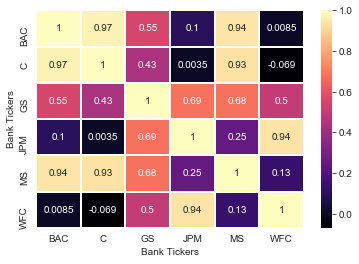

In [260]:
#Plot heatmap
sns.heatmap(ht,annot=True,cmap='magma',lw=1)

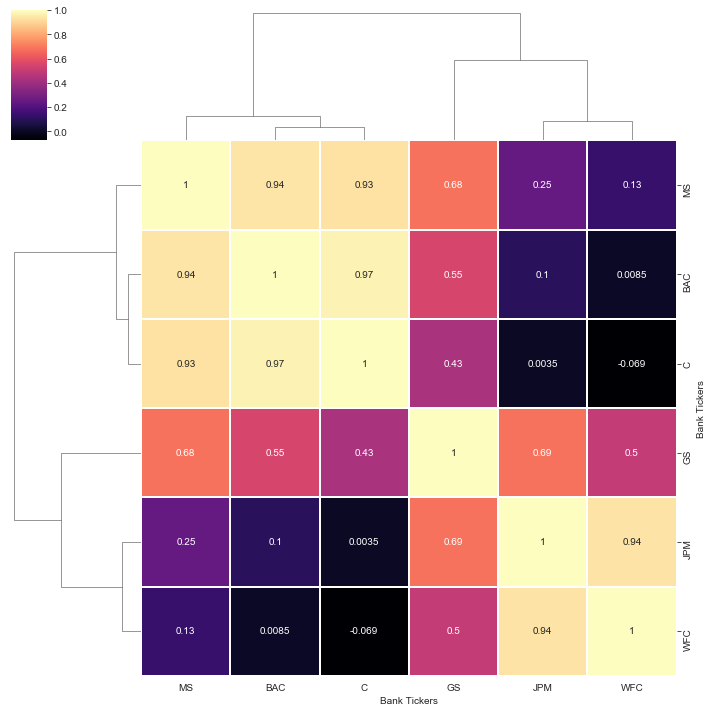

In [263]:
#Pot clustermap
sns.clustermap(ht,annot=True,cmap='magma',lw=1)

In [264]:
#Above showing some correlation between two main groups of banks

In [282]:
# Looking at BACs stock for 2015 to make a candle plot
BAC.loc['2015'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,18.030001,17.680000,17.990000,17.900000,48951100.0,16.352423
2015-01-05,17.809999,17.290001,17.790001,17.379999,105605500.0,15.877379
2015-01-06,17.440001,16.780001,17.420000,16.860001,144912400.0,15.402342
2015-01-07,17.180000,16.870001,17.139999,16.940001,104603800.0,15.475423
2015-01-08,17.340000,17.100000,17.160000,17.290001,73388500.0,15.795165


In [288]:
#Plotting:
BAC.loc['2015'].iplot(kind='candle')

In [284]:
#To plot simple Moving Averages plot of MS for the year 2015
MS.loc['2015'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,39.150002,38.250000,39.049999,38.709999,7333800.0,34.470112
2015-01-05,38.590000,37.169998,38.459999,37.500000,12507900.0,33.392639
2015-01-06,37.540001,36.060001,37.470001,36.419998,16507800.0,32.430935
2015-01-07,37.049999,36.599998,36.930000,36.939999,9957700.0,32.893978
2015-01-08,37.759998,37.290001,37.290001,37.490002,8079600.0,33.383732


In [294]:
MS['Close'].loc['2015'].ta_plot(study='sma',periods=[30,60])

In [290]:
#Bollinger Band Plot for BOA for the year 2015
BAC.loc['2015'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,18.030001,17.680000,17.990000,17.900000,48951100.0,16.352423
2015-01-05,17.809999,17.290001,17.790001,17.379999,105605500.0,15.877379
2015-01-06,17.440001,16.780001,17.420000,16.860001,144912400.0,15.402342
2015-01-07,17.180000,16.870001,17.139999,16.940001,104603800.0,15.475423
2015-01-08,17.340000,17.100000,17.160000,17.290001,73388500.0,15.795165


In [295]:
BAC['Close'].loc['2015'].ta_plot(study='boll')